# STOCK PRICE PREDICTION AND MODAL COMPARISION 

### submitted by : MANOJ SUNDAR RAVICHANDRAN 

In [2]:
pip install yfinance

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 58.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp311-cp311-linux_x86_64.whl size=300829 sha256=112be11a4ecd0a05afd692fa4d29fca5266dec8ab3895caf0dc93662add3883a
  Stored in directory: /home/jovyan/.cache/pip/wheels/25/cb/79/a133a0d1d75f318a96614ed7fb97bdf2f35a7b6c4d4e426e3f
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import math


# Fetching deutsche bank data from yahoo finance 

In [4]:
ticker_symbol = 'DBK.de'  


df = yf.download(ticker_symbol, start='2023-11-01', end='2024-11-01', interval='1d',auto_adjust=False)


print(df.head(10))


[*********************100%***********************]  1 of 1 completed

Price       Adj Close   Close    High     Low    Open    Volume
Ticker         DBK.DE  DBK.DE  DBK.DE  DBK.DE  DBK.DE    DBK.DE
Date                                                           
2023-11-01   9.890024  10.462  10.542  10.370  10.420   6983121
2023-11-02  10.031824  10.612  10.634  10.428  10.468  10520772
2023-11-03  10.077199  10.660  10.760  10.616  10.650  10258774
2023-11-06  10.045059  10.626  10.712  10.590  10.680   5362844
2023-11-07   9.948635  10.524  10.600  10.440  10.550   7368904
2023-11-08   9.959978  10.536  10.594  10.386  10.472   6169784
2023-11-09   9.967541  10.544  10.574  10.428  10.530   6251364
2023-11-10   9.922166  10.496  10.528  10.418  10.510   9615267
2023-11-13  10.026152  10.606  10.616  10.500  10.530   8327626
2023-11-14  10.137700  10.724  10.772  10.524  10.600  17805217


# Renaming the feature name and make it as dataframe 

In [5]:
df2= pd.DataFrame(columns=df.columns)

df.columns = [col[0].replace('.', '_').replace(' ', '') for col in df.columns] 
print("Updated Column Names:", df.columns)
df2=df.copy()

Updated Column Names: Index(['AdjClose', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [6]:
df2

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-01,9.890024,10.462,10.542000,10.370,10.420,6983121
2023-11-02,10.031824,10.612,10.634000,10.428,10.468,10520772
2023-11-03,10.077199,10.660,10.760000,10.616,10.650,10258774
2023-11-06,10.045059,10.626,10.712000,10.590,10.680,5362844
2023-11-07,9.948635,10.524,10.600000,10.440,10.550,7368904
...,...,...,...,...,...,...
2024-10-25,15.251818,15.676,16.000000,15.640,15.808,4743427
2024-10-28,15.421110,15.850,15.888000,15.566,15.746,4512546
2024-10-29,15.300465,15.726,16.016001,15.694,15.962,4130466


In [7]:
df2.index

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14',
               ...
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

# Understanding the data 


1. Adjclose: closing price of stock after adjustment for events like dividends,stock splits,and new stock offering 
2. Close : It is the final value of the stock for the day
3. High  : It is highest price at which stock was traded during specific day
4. Low   : It is lowest price at which stock was traded during specific day
5. Open  : The price of stock at the beginning of trading  session.
6. Volume: It is total number if shares traded during specific period

<Axes: xlabel='Date'>

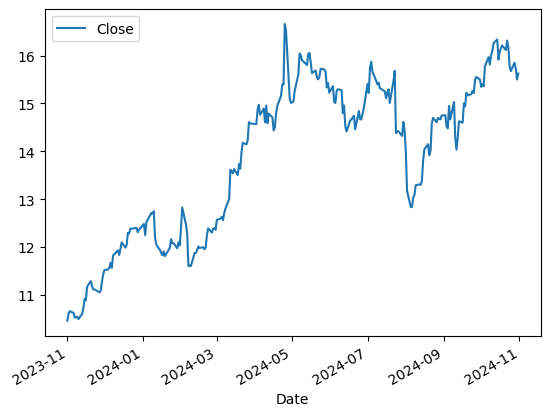

In [6]:
df2.plot.line(y='Close',use_index=True)

# Changing to pandas date time format 

In [8]:
df2.index

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14',
               ...
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [17]:
df2.index = pd.to_datetime(df2.index).normalize()
df2.index.name = 'Date'
df2

,AdjClose,Close,High,Low,Open,Volume
Date,,,,,,
2023-11-01,9.890024,10.462,10.542000,10.370,10.420,6983121
2023-11-02,10.031824,10.612,10.634000,10.428,10.468,10520772
2023-11-03,10.077199,10.660,10.760000,10.616,10.650,10258774
2023-11-06,10.045059,10.626,10.712000,10.590,10.680,5362844
2023-11-07,9.948635,10.524,10.600000,10.440,10.550,7368904
...,...,...,...,...,...,...
2024-10-25,15.251818,15.676,16.000000,15.640,15.808,4743427
2024-10-28,15.421110,15.850,15.888000,15.566,15.746,4512546
2024-10-29,15.300465,15.726,16.016001,15.694,15.962,4130466


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2023-11-01 to 2024-10-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AdjClose  256 non-null    float64
 1   Close     256 non-null    float64
 2   High      256 non-null    float64
 3   Low       256 non-null    float64
 4   Open      256 non-null    float64
 5   Volume    256 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.0 KB


In [9]:
df2.describe()

,AdjClose,Close,High,Low,Open,Volume
count,256.000000,256.000000,256.000000,256.000000,256.000000,2.560000e+02
mean,13.665417,13.859242,13.991602,13.693719,13.839508,7.471893e+06
std,1.773656,1.672786,1.700566,1.643644,1.680560,4.338937e+06
min,10.165084,10.462000,10.528000,10.370000,10.420000,0.000000e+00
25%,11.938290,12.287000,12.394000,12.141000,12.257500,4.907434e+06
50%,14.306262,14.470000,14.668000,14.283000,14.464000,6.301648e+06
75%,15.233000,15.268000,15.413000,15.080000,15.270000,8.835046e+06
max,16.336000,16.660000,17.014000,16.469999,16.712000,3.218309e+07


# Outliers 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


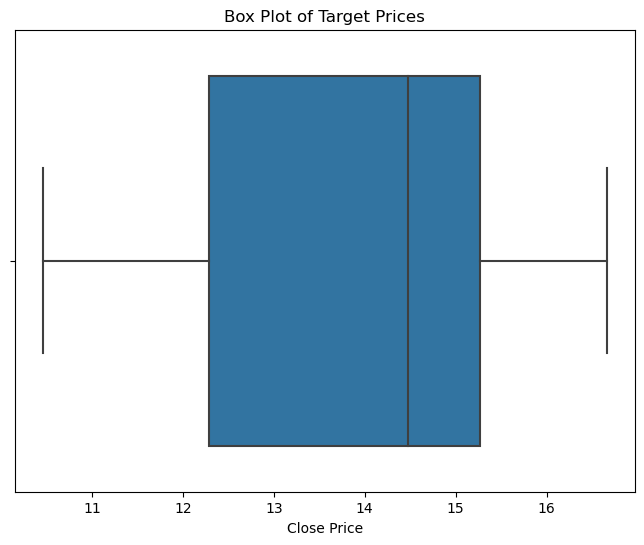

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df2, x='Close')
plt.title('Box Plot of Target Prices')
plt.xlabel('Close Price')
plt.show()


# Outliers : statistical method  

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'close'
Q1 = df2['Close'].quantile(0.25)  # 25th percentile (Q1)
Q3 = df2['Close'].quantile(0.75)  # 75th percentile (Q3)

# Display the results
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)


Q1 (25th percentile): 12.287000179290771
Q3 (75th percentile): 15.26799988746643


In [12]:
IQR = Q3 - Q1
IQR

2.980999708175659

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

7.815500617027283
19.73949944972992


In [14]:
outliers_close = df2[(df2['Close'] < lower_bound) | (df2['Close'] > upper_bound)]

# Display outliers
print("Outliers in 'close':\n", outliers_close)

Outliers in 'close':
 Empty DataFrame
Columns: [AdjClose, Close, High, Low, Open, Volume]
Index: []


# Train and test split 

In [15]:
from sklearn.model_selection import train_test_split
X=df2.drop(columns=['Close'])
y=df2['Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [16]:
X_train

,AdjClose,High,Low,Open,Volume
Date,,,,,
2023-11-01,10.165084,10.542,10.370,10.420,6983121
2023-11-02,10.310827,10.634,10.428,10.468,10520772
2023-11-03,10.357465,10.760,10.616,10.650,10258774
2023-11-06,10.324430,10.712,10.590,10.680,5362844
2023-11-07,10.225325,10.600,10.440,10.550,7368904
...,...,...,...,...,...
2024-08-14,13.380000,13.450,13.288,13.366,3336650
2024-08-15,13.810000,13.878,13.440,13.480,5097272
2024-08-16,14.040000,14.054,13.770,13.864,5338601


In [17]:
X_test

,AdjClose,High,Low,Open,Volume
Date,,,,,
2024-08-21,14.008000,14.086000,13.848000,13.896000,2653778
2024-08-22,14.572000,14.620000,14.120000,14.420000,8254396
2024-08-23,14.700000,14.828000,14.590000,14.630000,4331005
2024-08-26,14.606000,14.714000,14.564000,14.654000,1609903
2024-08-27,14.698000,14.804000,14.582000,14.624000,3374828
2024-08-28,14.680000,14.808000,14.606000,14.770000,2704245
2024-08-29,14.666000,14.788000,14.600000,14.624000,2411367
2024-08-30,14.748000,14.790000,14.684000,14.702000,5285232
2024-09-02,14.754000,14.800000,14.562000,14.800000,4323853


In [18]:
y_train

Date
2023-11-01    10.462
2023-11-02    10.612
2023-11-03    10.660
2023-11-06    10.626
2023-11-07    10.524
               ...  
2024-08-14    13.380
2024-08-15    13.810
2024-08-16    14.040
2024-08-19    14.148
2024-08-20    13.918
Name: Close, Length: 204, dtype: float64

In [19]:
y_test

Date
2024-08-21    14.008000
2024-08-22    14.572000
2024-08-23    14.700000
2024-08-26    14.606000
2024-08-27    14.698000
2024-08-28    14.680000
2024-08-29    14.666000
2024-08-30    14.748000
2024-09-02    14.754000
2024-09-03    14.516000
2024-09-04    14.480000
2024-09-05    14.948000
2024-09-06    14.668000
2024-09-09    15.030000
2024-09-10    14.292000
2024-09-11    14.034000
2024-09-12    14.280000
2024-09-13    14.628000
2024-09-16    14.598000
2024-09-17    15.000000
2024-09-18    14.938000
2024-09-19    15.222000
2024-09-20    15.168000
2024-09-23    15.194000
2024-09-24    15.262000
2024-09-25    15.218000
2024-09-26    15.492000
2024-09-27    15.554000
2024-09-30    15.498000
2024-10-01    15.346000
2024-10-02    15.408000
2024-10-03    15.360000
2024-10-04    15.776000
2024-10-07    15.966000
2024-10-08    15.812000
2024-10-09    16.004000
2024-10-10    16.096001
2024-10-11    16.257999
2024-10-14    16.336000
2024-10-15    15.916000
2024-10-16    16.082001
2024-10-17 

# Feature Engineering Train data

# Lag feature 

In [20]:
# Assuming 'df' is your original dataset containing 'close' feature

#X_train['Close'] = y_train.copy()

X_train['lag1'] = X_train['AdjClose'].shift(1) 
#X_train['lag5'] = X_train['Close'].shift(5)
#X_train['lag1'] = np.nan
X_train['lag1'] = X_train['lag1'].bfill()

#df2['lag-1'] = df2['Close'].shift(-30) 
#df2['lag-5'] = df2['Close'].shift(-)
#df2['seasonalmonthly_lag']=df2['seasonalMontly'].shift(-1)


In [21]:
#X_train = X_train.dropna(subset=['lag1'])

In [22]:
X_train

,AdjClose,High,Low,Open,Volume,lag1
Date,,,,,,
2023-11-01,10.165084,10.542,10.370,10.420,6983121,10.165084
2023-11-02,10.310827,10.634,10.428,10.468,10520772,10.165084
2023-11-03,10.357465,10.760,10.616,10.650,10258774,10.310827
2023-11-06,10.324430,10.712,10.590,10.680,5362844,10.357465
2023-11-07,10.225325,10.600,10.440,10.550,7368904,10.324430
...,...,...,...,...,...,...
2024-08-14,13.380000,13.450,13.288,13.366,3336650,13.300000
2024-08-15,13.810000,13.878,13.440,13.480,5097272,13.380000
2024-08-16,14.040000,14.054,13.770,13.864,5338601,13.810000


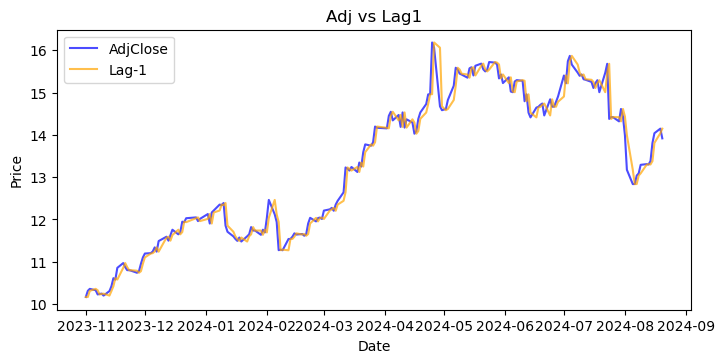

In [23]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 2, 1)
plt.plot(X_train.index, X_train['AdjClose'], label='AdjClose', color='blue', alpha=0.7)
plt.plot(X_train.index, X_train['lag1'], label='Lag-1', color='orange', alpha=0.7)
#plt.plot(X_train.index, X_train['lag5'], label='Lag-5',alpha=0.7)
#plt.plot(df2.index, df2['lag-1'], label='Lag-1',alpha=0.7)
#plt.plot(df2.index, df2['lag-5'], label='Lag-5',color='red' ,alpha=0.7)
#plt.plot(df2.index, df2['seasonalmonthly_lag'], label='Lag-5', color='red' ,alpha=0.7)
plt.title('Adj vs Lag1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Trend Analysis 

## Moving average of 5 

In [24]:

X_train['moving_avg_5'] = X_train['AdjClose'].rolling(window=5,min_periods=1).mean()

#df2['moving_avg_7'] = df2['Close'].rolling(window=30,min_periods=1).mean()
#df2['moving_avg_30'] = df2['Close'].rolling(window=30,min_periods=1).mean()
#df2['moving_avg_180'] = df2['Close'].rolling(window=180,min_periods=1).mean()

In [25]:
X_train

,AdjClose,High,Low,Open,Volume,lag1,moving_avg_5
Date,,,,,,,
2023-11-01,10.165084,10.542,10.370,10.420,6983121,10.165084,10.165084
2023-11-02,10.310827,10.634,10.428,10.468,10520772,10.165084,10.237956
2023-11-03,10.357465,10.760,10.616,10.650,10258774,10.310827,10.277792
2023-11-06,10.324430,10.712,10.590,10.680,5362844,10.357465,10.289452
2023-11-07,10.225325,10.600,10.440,10.550,7368904,10.324430,10.276626
...,...,...,...,...,...,...,...
2024-08-14,13.380000,13.450,13.288,13.366,3336650,13.300000,13.274000
2024-08-15,13.810000,13.878,13.440,13.480,5097272,13.380000,13.418000
2024-08-16,14.040000,14.054,13.770,13.864,5338601,13.810000,13.567600


<Axes: xlabel='Date'>

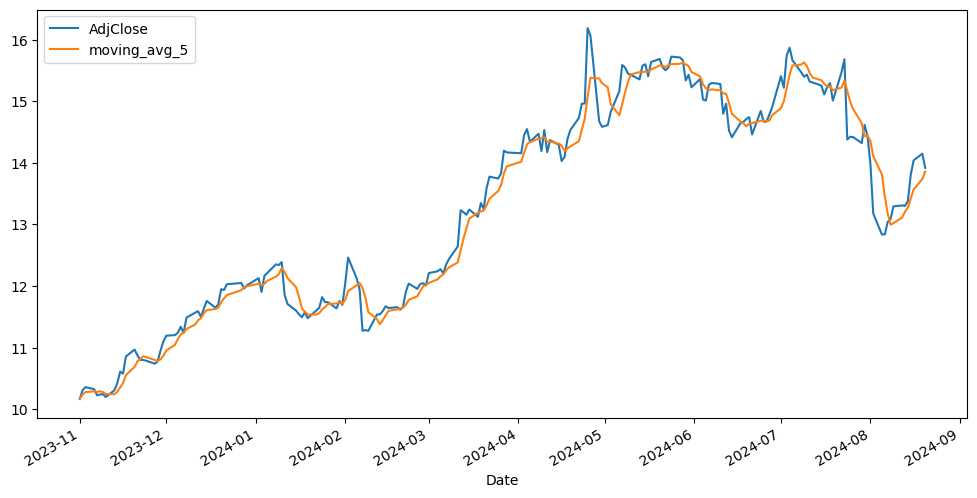

In [26]:
X_train[['AdjClose','moving_avg_5']].plot(figsize=(12, 6))

In [27]:
 #Drop the 'DayOfWeek' string column
#X_train = X_train.drop('DayOfWeek', axis=1)

In [28]:
X_train

,AdjClose,High,Low,Open,Volume,lag1,moving_avg_5
Date,,,,,,,
2023-11-01,10.165084,10.542,10.370,10.420,6983121,10.165084,10.165084
2023-11-02,10.310827,10.634,10.428,10.468,10520772,10.165084,10.237956
2023-11-03,10.357465,10.760,10.616,10.650,10258774,10.310827,10.277792
2023-11-06,10.324430,10.712,10.590,10.680,5362844,10.357465,10.289452
2023-11-07,10.225325,10.600,10.440,10.550,7368904,10.324430,10.276626
...,...,...,...,...,...,...,...
2024-08-14,13.380000,13.450,13.288,13.366,3336650,13.300000,13.274000
2024-08-15,13.810000,13.878,13.440,13.480,5097272,13.380000,13.418000
2024-08-16,14.040000,14.054,13.770,13.864,5338601,13.810000,13.567600


# Test data

In [29]:
X_test


,AdjClose,High,Low,Open,Volume
Date,,,,,
2024-08-21,14.008000,14.086000,13.848000,13.896000,2653778
2024-08-22,14.572000,14.620000,14.120000,14.420000,8254396
2024-08-23,14.700000,14.828000,14.590000,14.630000,4331005
2024-08-26,14.606000,14.714000,14.564000,14.654000,1609903
2024-08-27,14.698000,14.804000,14.582000,14.624000,3374828
2024-08-28,14.680000,14.808000,14.606000,14.770000,2704245
2024-08-29,14.666000,14.788000,14.600000,14.624000,2411367
2024-08-30,14.748000,14.790000,14.684000,14.702000,5285232
2024-09-02,14.754000,14.800000,14.562000,14.800000,4323853


In [30]:
X_train.columns

Index(['AdjClose', 'High', 'Low', 'Open', 'Volume', 'lag1', 'moving_avg_5'], dtype='object')

In [31]:
X_test.columns

Index(['AdjClose', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [32]:
X_train.tail()

,AdjClose,High,Low,Open,Volume,lag1,moving_avg_5
Date,,,,,,,
2024-08-14,13.380,13.450,13.288,13.366,3336650,13.300,13.2740
2024-08-15,13.810,13.878,13.440,13.480,5097272,13.380,13.4180
2024-08-16,14.040,14.054,13.770,13.864,5338601,13.810,13.5676
2024-08-19,14.148,14.148,14.008,14.040,3576652,14.040,13.7356
2024-08-20,13.918,14.204,13.866,14.176,4737265,14.148,13.8592


# Feature Engineering for test

In [33]:
import numpy as np
import pandas as pd

# Initialize moving average buffer with last 5 values from X_train (to avoid future leakage)
last_five_closes_train = X_train['AdjClose'].iloc[-5:].values 
moving_avg_buffer = list(last_five_closes_train)

X_test['lag1'] = np.nan 
X_test['moving_avg_5'] = np.nan


for i in range(len(X_test)):
   
    if i > 0:
        X_test.loc[X_test.index[i], 'lag1'] = X_test.loc[X_test.index[i - 1], 'AdjClose']
    
    if i == 0:
        X_test.loc[X_test.index[i], 'lag1'] = X_test.loc[X_test.index[i], 'AdjClose']  

   
    moving_avg_buffer.append(X_test.loc[X_test.index[i], 'AdjClose'])
    
    if len(moving_avg_buffer) >= 5:
        moving_avg_5 = np.mean(moving_avg_buffer[-5:])  
    else:
        moving_avg_5 = np.mean(moving_avg_buffer)  

    X_test.loc[X_test.index[i], 'moving_avg_5'] = moving_avg_5




In [34]:
X_test.columns

Index(['AdjClose', 'High', 'Low', 'Open', 'Volume', 'lag1', 'moving_avg_5'], dtype='object')

In [35]:
X_test

,AdjClose,High,Low,Open,Volume,lag1,moving_avg_5
Date,,,,,,,
2024-08-21,14.008000,14.086000,13.848000,13.896000,2653778,14.008000,13.9848
2024-08-22,14.572000,14.620000,14.120000,14.420000,8254396,14.008000,14.1372
2024-08-23,14.700000,14.828000,14.590000,14.630000,4331005,14.572000,14.2692
2024-08-26,14.606000,14.714000,14.564000,14.654000,1609903,14.700000,14.3608
2024-08-27,14.698000,14.804000,14.582000,14.624000,3374828,14.606000,14.5168
2024-08-28,14.680000,14.808000,14.606000,14.770000,2704245,14.698000,14.6512
2024-08-29,14.666000,14.788000,14.600000,14.624000,2411367,14.680000,14.6700
2024-08-30,14.748000,14.790000,14.684000,14.702000,5285232,14.666000,14.6796
2024-09-02,14.754000,14.800000,14.562000,14.800000,4323853,14.748000,14.7092


# Scaling for Model 

In [36]:
train_data= X_train[['lag1', 'moving_avg_5']]

test_data = X_test[['lag1', 'moving_avg_5']]

y_train_numpy=y_train.to_numpy()
y_test_numpy=y_test.to_numpy()

In [37]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

target_scaler = StandardScaler()  # Initialize a separate scaler for target

# Scale the target data (y_train and y_test)
y_train_scaled = target_scaler.fit_transform(y_train_numpy.reshape(-1,1))  # Reshape for 2D input to scaler
y_test_scaled = target_scaler.transform(y_test_numpy.reshape(-1,1))



In [38]:
train_data_scaled

array([[-1.76329135e+00, -1.75619598e+00],
       [-1.76329135e+00, -1.71423419e+00],
       [-1.67954081e+00, -1.69129514e+00],
       [-1.65274084e+00, -1.68458117e+00],
       [-1.67172381e+00, -1.69196643e+00],
       [-1.72867437e+00, -1.68368594e+00],
       [-1.72197424e+00, -1.69129503e+00],
       [-1.71750785e+00, -1.70964616e+00],
       [-1.74430728e+00, -1.71188419e+00],
       [-1.68289088e+00, -1.68950468e+00],
       [-1.61700755e+00, -1.64653590e+00],
       [-1.50757337e+00, -1.60826680e+00],
       [-1.52655688e+00, -1.53262404e+00],
       [-1.36687337e+00, -1.45630977e+00],
       [-1.30210636e+00, -1.40416538e+00],
       [-1.35682318e+00, -1.38223343e+00],
       [-1.39813973e+00, -1.35672077e+00],
       [-1.39925660e+00, -1.36455348e+00],
       [-1.40595619e+00, -1.39096127e+00],
       [-1.43387303e+00, -1.40215097e+00],
       [-1.41265632e+00, -1.38469485e+00],
       [-1.31103914e+00, -1.34978274e+00],
       [-1.22505596e+00, -1.30300952e+00],
       [-1.

In [39]:
train_data_scaled = pd.DataFrame(train_data_scaled, columns=[ 'lag1', 'moving_avg_5'])
train_data_scaled

,lag1,moving_avg_5
0,-1.763291,-1.756196
1,-1.763291,-1.714234
2,-1.679541,-1.691295
3,-1.652741,-1.684581
4,-1.671724,-1.691966
...,...,...
199,0.038169,0.034015
200,0.084140,0.116935
201,0.331238,0.203079
202,0.463405,0.299819


In [40]:
test_data_scaled

array([[0.44501696, 0.44331586],
       [0.44501696, 0.53107244],
       [0.76911562, 0.60708214],
       [0.84267018, 0.6598283 ],
       [0.78865374, 0.74965794],
       [0.84152097, 0.82704964],
       [0.83117759, 0.83787536],
       [0.82313261, 0.84340338],
       [0.87025328, 0.86044796],
       [0.87370089, 0.83948768],
       [0.7369357 , 0.81645435],
       [0.71624838, 0.84893118],
       [0.98518194, 0.83971789],
       [0.82428181, 0.87150378],
       [1.0323026 , 0.84570654],
       [0.60821549, 0.7943425 ],
       [0.45995772, 0.71741142],
       [0.60131972, 0.71280477],
       [0.80129608, 0.66305294],
       [0.78405637, 0.74459066],
       [1.01506344, 0.84870087],
       [0.97943537, 0.95718751],
       [1.14263445, 1.01937728],
       [1.11160374, 1.08801643],
       [1.12654449, 1.11819   ],
       [1.16562018, 1.15043663],
       [1.14033604, 1.18153145],
       [1.297788  , 1.22598559],
       [1.33341608, 1.26099611],
       [1.30123616, 1.27067004],
       [1.

In [41]:
test_data_scaled = pd.DataFrame(test_data_scaled, columns=[ 'lag1', 'moving_avg_5'])
test_data_scaled

,lag1,moving_avg_5
0,0.445017,0.443316
1,0.445017,0.531072
2,0.769116,0.607082
3,0.842670,0.659828
4,0.788654,0.749658
5,0.841521,0.827050
6,0.831178,0.837875
7,0.823133,0.843403
8,0.870253,0.860448
9,0.873701,0.839488


In [42]:
y_train_scaled

array([[-1.83286809],
       [-1.7422276 ],
       [-1.71322313],
       [-1.7337679 ],
       [-1.79540333],
       [-1.78815207],
       [-1.78331828],
       [-1.81232275],
       [-1.74585352],
       [-1.67454993],
       [-1.55611342],
       [-1.57665876],
       [-1.40383808],
       [-1.33374293],
       [-1.39296147],
       [-1.43767692],
       [-1.43888536],
       [-1.44613662],
       [-1.47635012],
       [-1.45338789],
       [-1.34341109],
       [-1.25035429],
       [-1.19355264],
       [-1.1875104 ],
       [-1.16333972],
       [-1.10291273],
       [-1.16575662],
       [-1.00985535],
       [-0.96272244],
       [-0.94580302],
       [-1.00381312],
       [-0.92163234],
       [-0.84307749],
       [-0.91075574],
       [-0.87812535],
       [-0.72464155],
       [-0.73189224],
       [-0.67388272],
       [-0.66179767],
       [-0.71618127],
       [-0.68355088],
       [-0.61224729],
       [-0.75243758],
       [-0.58928505],
       [-0.56028058],
       [-0

In [43]:
y_test_scaled

array([[0.30986507],
       [0.65067149],
       [0.7280179 ],
       [0.67121683],
       [0.72680945],
       [0.71593284],
       [0.70747313],
       [0.75702294],
       [0.76064829],
       [0.61683265],
       [0.59507887],
       [0.87787635],
       [0.70868158],
       [0.92742615],
       [0.48147672],
       [0.32557604],
       [0.47422546],
       [0.6845109 ],
       [0.66638246],
       [0.90929829],
       [0.87183353],
       [1.04344577],
       [1.01081538],
       [1.02652635],
       [1.06761645],
       [1.04102887],
       [1.20659771],
       [1.24406247],
       [1.21022363],
       [1.1183747 ],
       [1.15583946],
       [1.12683441],
       [1.37820995],
       [1.49302054],
       [1.39996373],
       [1.51598277],
       [1.57157597],
       [1.66946656],
       [1.71660005],
       [1.46280762],
       [1.56311626],
       [1.60662268],
       [1.63925364],
       [1.58366044],
       [1.7033054 ],
       [1.61991733],
       [1.38546121],
       [1.317

# Model Training 

In [44]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(train_data_scaled, y_train_scaled)  


predictions = []

#test_features = X_test_scaled.copy()


for i in range(len(test_data_scaled)):
    
    features_for_prediction = test_data_scaled.iloc[i:i+1]
    
    
    predicted_close_scaled = model.predict(features_for_prediction)[0]

    predictions.append(predicted_close_scaled)
    


predictions_scaled_df = pd.DataFrame(predictions, columns=['Predicted_Close'], index=test_data.index)


predictions_original = target_scaler.inverse_transform(predictions_scaled_df)


predictions_df = pd.DataFrame(predictions_original, columns=['Predicted_Close'], index=test_data.index)

print(predictions_df)


            Predicted_Close
Date                       
2024-08-21        14.219320
2024-08-22        14.247261
2024-08-23        14.696026
2024-08-26        14.809175
2024-08-27        14.767015
2024-08-28        14.860912
2024-08-29        14.850809
2024-08-30        14.842030
2024-09-02        14.909184
2024-09-03        14.907027
2024-09-04        14.720533
2024-09-05        14.703773
2024-09-06        15.053139
2024-09-09        14.852482
2024-09-10        15.116773
2024-09-11        14.544871
2024-09-12        14.326161
2024-09-13        14.509877
2024-09-16        14.756002
2024-09-17        14.759379
2024-09-18        15.095143
2024-09-19        15.083012
2024-09-20        15.316601
2024-09-23        15.297806
2024-09-24        15.326985
2024-09-25        15.388440
2024-09-26        15.365219
2024-09-27        15.585632
2024-09-30        15.643452
2024-10-01        15.604377
2024-10-02        15.496921
2024-10-03        15.538753
2024-10-04        15.510760
2024-10-07        15

# CLOSE VS PREDICTED VALUE

In [45]:

comparison_df = pd.DataFrame({'Actual_value': y_test.values, 'Predicted_Value': predictions_df['Predicted_Close'].values},index=X_test.index)
comparison_df

,Actual_value,Predicted_Value
Date,,
2024-08-21,14.008000,14.219320
2024-08-22,14.572000,14.247261
2024-08-23,14.700000,14.696026
2024-08-26,14.606000,14.809175
2024-08-27,14.698000,14.767015
2024-08-28,14.680000,14.860912
2024-08-29,14.666000,14.850809
2024-08-30,14.748000,14.842030
2024-09-02,14.754000,14.909184


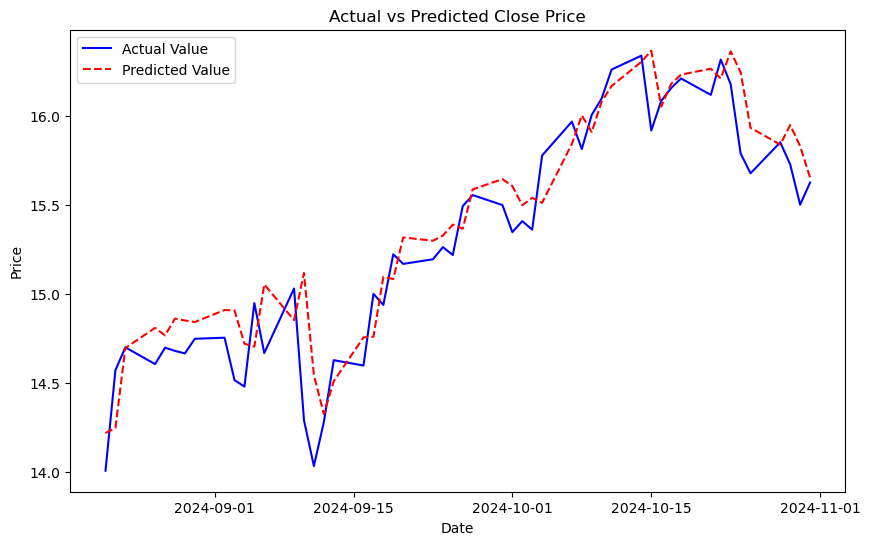

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))


plt.plot(comparison_df.index, comparison_df['Actual_value'], label='Actual Value', color='blue')


plt.plot(comparison_df.index, comparison_df['Predicted_Value'], label='Predicted Value', color='red', linestyle='--')


plt.title('Actual vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


plt.show()


# Evaluation 

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions_df['Predicted_Close'])
mse = mean_squared_error(y_test, predictions_df['Predicted_Close'])
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions_df['Predicted_Close'])

# Print the metrics
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 0.1819
Mean Squared Error (MSE): 0.0554
Root Mean Squared Error (RMSE): 0.2354
R-squared (R²): 0.8676



# Predict Next day close price (1st Novemeber)

In [48]:

last_5_close = predictions_df['Predicted_Close'].iloc[-5:] 
lag_1 = last_5_close.iloc[-1]               
moving_avg_5 = last_5_close.mean()          


In [49]:
last_5_close

Date
2024-10-25    15.931292
2024-10-28    15.837227
2024-10-29    15.946650
2024-10-30    15.828518
2024-10-31    15.652377
Name: Predicted_Close, dtype: float64

In [50]:
lag_1

15.652376993253618

In [51]:
moving_avg_5

15.839212573671139

In [52]:

next_day_features = [[lag_1, moving_avg_5]]


scaled_features = scaler.transform(next_day_features)
scaled_features

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[1.38994787, 1.51114441]])

In [53]:

nov_1_prediction_scaled = model.predict(scaled_features)

if len(nov_1_prediction_scaled.shape) == 1:
    nov_1_prediction_scaled = nov_1_prediction_scaled.reshape(-1, 1)


nov_1_prediction_original = target_scaler.inverse_transform(nov_1_prediction_scaled)


print(f"Predicted Close price for 1st November 2024: {nov_1_prediction_original[0][0]:.4f}")



Predicted Close price for 1st November 2024: 15.7972


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# LSTM 

In [54]:
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import LightningModule, Trainer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [55]:
X_train

,AdjClose,High,Low,Open,Volume,lag1,moving_avg_5
Date,,,,,,,
2023-11-01,10.165084,10.542,10.370,10.420,6983121,10.165084,10.165084
2023-11-02,10.310827,10.634,10.428,10.468,10520772,10.165084,10.237956
2023-11-03,10.357465,10.760,10.616,10.650,10258774,10.310827,10.277792
2023-11-06,10.324430,10.712,10.590,10.680,5362844,10.357465,10.289452
2023-11-07,10.225325,10.600,10.440,10.550,7368904,10.324430,10.276626
...,...,...,...,...,...,...,...
2024-08-14,13.380000,13.450,13.288,13.366,3336650,13.300000,13.274000
2024-08-15,13.810000,13.878,13.440,13.480,5097272,13.380000,13.418000
2024-08-16,14.040000,14.054,13.770,13.864,5338601,13.810000,13.567600


In [56]:
X_test

,AdjClose,High,Low,Open,Volume,lag1,moving_avg_5
Date,,,,,,,
2024-08-21,14.008000,14.086000,13.848000,13.896000,2653778,14.008000,13.9848
2024-08-22,14.572000,14.620000,14.120000,14.420000,8254396,14.008000,14.1372
2024-08-23,14.700000,14.828000,14.590000,14.630000,4331005,14.572000,14.2692
2024-08-26,14.606000,14.714000,14.564000,14.654000,1609903,14.700000,14.3608
2024-08-27,14.698000,14.804000,14.582000,14.624000,3374828,14.606000,14.5168
2024-08-28,14.680000,14.808000,14.606000,14.770000,2704245,14.698000,14.6512
2024-08-29,14.666000,14.788000,14.600000,14.624000,2411367,14.680000,14.6700
2024-08-30,14.748000,14.790000,14.684000,14.702000,5285232,14.666000,14.6796
2024-09-02,14.754000,14.800000,14.562000,14.800000,4323853,14.748000,14.7092


In [57]:
y_train

Date
2023-11-01    10.462
2023-11-02    10.612
2023-11-03    10.660
2023-11-06    10.626
2023-11-07    10.524
               ...  
2024-08-14    13.380
2024-08-15    13.810
2024-08-16    14.040
2024-08-19    14.148
2024-08-20    13.918
Name: Close, Length: 204, dtype: float64

In [58]:
y_test

Date
2024-08-21    14.008000
2024-08-22    14.572000
2024-08-23    14.700000
2024-08-26    14.606000
2024-08-27    14.698000
2024-08-28    14.680000
2024-08-29    14.666000
2024-08-30    14.748000
2024-09-02    14.754000
2024-09-03    14.516000
2024-09-04    14.480000
2024-09-05    14.948000
2024-09-06    14.668000
2024-09-09    15.030000
2024-09-10    14.292000
2024-09-11    14.034000
2024-09-12    14.280000
2024-09-13    14.628000
2024-09-16    14.598000
2024-09-17    15.000000
2024-09-18    14.938000
2024-09-19    15.222000
2024-09-20    15.168000
2024-09-23    15.194000
2024-09-24    15.262000
2024-09-25    15.218000
2024-09-26    15.492000
2024-09-27    15.554000
2024-09-30    15.498000
2024-10-01    15.346000
2024-10-02    15.408000
2024-10-03    15.360000
2024-10-04    15.776000
2024-10-07    15.966000
2024-10-08    15.812000
2024-10-09    16.004000
2024-10-10    16.096001
2024-10-11    16.257999
2024-10-14    16.336000
2024-10-15    15.916000
2024-10-16    16.082001
2024-10-17 

In [59]:
X_train.columns

Index(['AdjClose', 'High', 'Low', 'Open', 'Volume', 'lag1', 'moving_avg_5'], dtype='object')

In [60]:
X_test.columns

Index(['AdjClose', 'High', 'Low', 'Open', 'Volume', 'lag1', 'moving_avg_5'], dtype='object')

# Scaling 

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))  
X_train_scaled = scaler_X.fit_transform(X_train[['AdjClose','High','Low','Open','Volume','lag1','moving_avg_5']])
X_test_scaled = scaler_X.transform(X_test[['AdjClose','High','Low','Open','Volume','lag1','moving_avg_5']])

scaler_y = MinMaxScaler(feature_range=(0, 1)) 
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [62]:
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Define a function to create sequences
def create_sequences(X, y, n_steps):
    X_seq, y_seq = [], []
    for i in range(n_steps, len(X)):
        X_seq.append(X[i - n_steps:i]) 
        y_seq.append(y[i])  
    return np.array(X_seq), np.array(y_seq)

timesteps= 7

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled,timesteps)


X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled,timesteps)

print("X_train_seq shape:", X_train_seq.shape)  
print("y_train_seq shape:", y_train_seq.shape)  

print("X_test_seq shape:", X_test_seq.shape)    
print("y_test_seq shape:", y_test_seq.shape)    
train_dataset = TensorDataset(torch.tensor(X_train_seq, dtype=torch.float32), torch.tensor(y_train_seq, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test_seq, dtype=torch.float32), torch.tensor(y_test_seq, dtype=torch.float32))

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=32,shuffle=False)



X_train_seq shape: (197, 7, 7)
y_train_seq shape: (197, 1)
X_test_seq shape: (45, 7, 7)
y_test_seq shape: (45, 1)


In [63]:
# Convert agian to the DataFrame
#X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=['Adjclose','lag1','moving_avg_5','Open','High','Low'])
#X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=['Adjclose','lag1','moving_avg_5','Open','High','Low'])
#y_train_scaled_df=pd.DataFrame(y_train_scaled,columns=['target'])
#y_test_scaled_df=pd.DataFrame(y_test_scaled,columns=['target'])

In [64]:
#print(X_train_scaled_df.describe())
#print(X_test_scaled_df.describe())

#print(y_train_scaled_df.describe())
#print(y_test_scaled_df.describe())


In [65]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset

In [66]:
import torch
import torch.nn as nn
import pytorch_lightning as pl

from sklearn.preprocessing import MinMaxScaler
import numpy as np

class LSTMModel(pl.LightningModule):
    def __init__(self, input_size, hidden_layer_size,output_dim=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
       
        

        self.lstm = nn.LSTM(input_size, hidden_layer_size,batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_time_step_output = lstm_out[:, -1, :]
        output = self.linear(last_time_step_output)
        return output

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer




model = LSTMModel(input_size=X_train_seq.shape[2],hidden_layer_size=50)


trainer = pl.Trainer(max_epochs=1000, devices=1, accelerator='gpu')



trainer.fit(model, train_dataloader)


trainer.test(model, test_dataloader)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
You are using a CUDA device ('NVIDIA A100-SXM4-80GB MIG 1g.10gb') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name   | Type   | Params
----------------------------------
0 | lstm   | LSTM   | 11.8 K
1 | linear | Linear | 51    
----------------------------------
11.9 K    Trainable params
0         Non-trainable params
11.9 K    Total params
0.047     Total

Training: |          | 0/? [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

`Trainer.fit` stopped: `max_epochs=1000` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=55` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

[{}]

In [67]:
X_test.shape

(52, 7)

In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = model.to(device)


In [69]:
import torch
import torch.nn as nn
import torch.optim as optim


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = model.to(device)


model.eval()


predictions = []
actuals = []


with torch.no_grad():
    for x, y in test_dataloader:
        
       
        x = x.float().to(device)  
        y = y.float().to(device) 
        
      
        y_hat = model(x)
        
       
        predictions.append(y_hat.cpu())  
        actuals.append(y.cpu())


predictions = torch.cat(predictions, dim=0)
actuals = torch.cat(actuals, dim=0)


predictions = predictions.view(-1)
actuals = actuals.view(-1)


print(f"Predictions shape: {predictions.shape}")
print(f"Actuals shape: {actuals.shape}")


criterion = nn.MSELoss() 
loss = criterion(predictions, actuals)
print(f"Test Loss: {loss.item()}")


Predictions shape: torch.Size([45])
Actuals shape: torch.Size([45])
Test Loss: 0.0020123813301324844


In [70]:



predictions_original = scaler_y.inverse_transform(predictions.view(-1, 1))
actuals_original = scaler_y.inverse_transform(actuals.view(-1, 1))


predictions_original = predictions_original.flatten()
actuals_original = actuals_original.flatten()


print("First few predictions (original scale):", predictions_original[:5])
print("First few actuals (original scale):", actuals_original[:5])



First few predictions (original scale): [14.77744283 14.78728518 14.7903544  14.7308851  14.4863338 ]
First few actuals (original scale): [14.74800003 14.75399957 14.51599973 14.47999956 14.94799998]


In [71]:
import pandas as pd


date_indices = X_test.index[timesteps:] 


results_df = pd.DataFrame({
    'Date': date_indices,
    'Actual': actuals_original,
    'Predicted': predictions_original
})


results_df.set_index('Date', inplace=True)


results_df


,Actual,Predicted
Date,,
2024-08-30,14.748000,14.777443
2024-09-02,14.754000,14.787285
2024-09-03,14.516000,14.790354
2024-09-04,14.480000,14.730885
2024-09-05,14.948000,14.486334
2024-09-06,14.668000,14.945816
2024-09-09,15.030000,14.618092
2024-09-10,14.292000,15.018688
2024-09-11,14.034001,14.554652


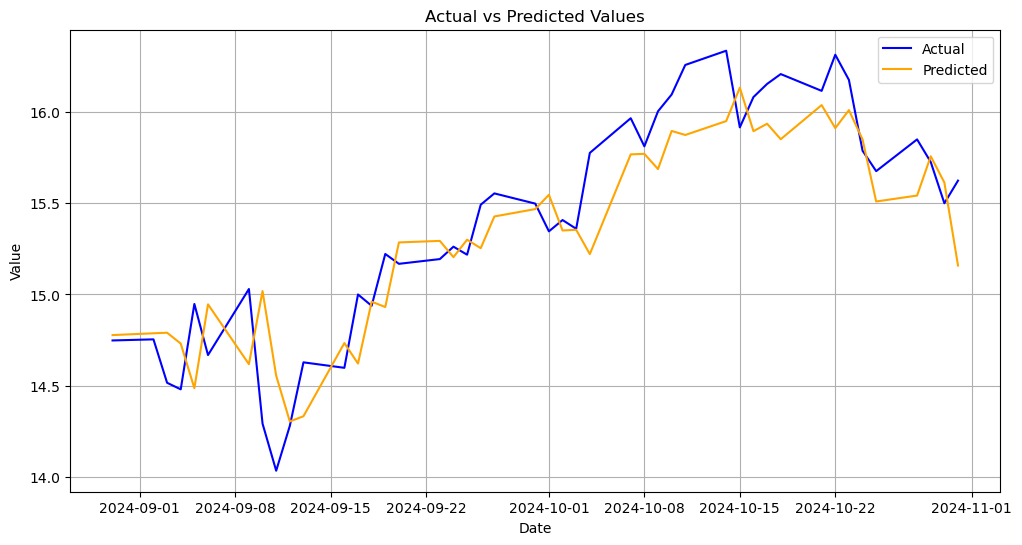

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted', color='orange')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()





In [73]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



mse = mean_squared_error(actuals_original,predictions_original)
mae = mean_absolute_error(actuals_original,predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(actuals_original, predictions_original)


print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R²): {r2:.4f}')



Mean Squared Error (MSE): 0.0773
Mean Absolute Error (MAE): 0.2222
Root Mean Squared Error (RMSE): 0.2780
R-squared (R²): 0.7969


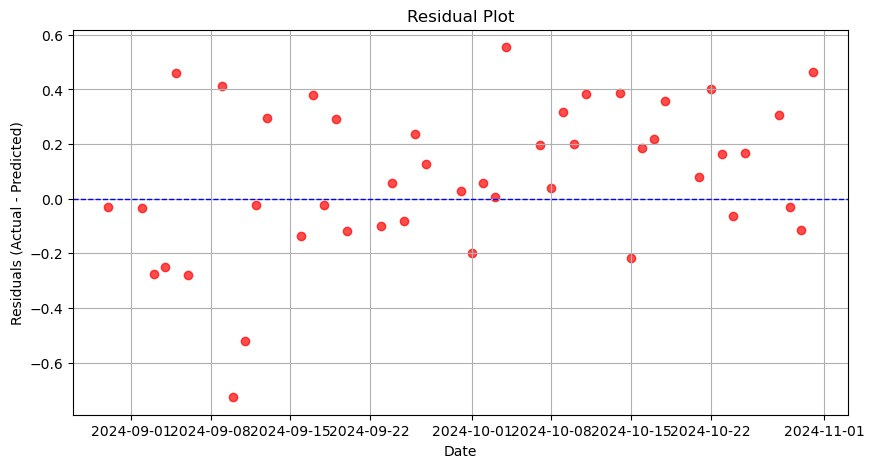

In [74]:
import matplotlib.pyplot as plt

residuals = results_df['Actual'] - results_df['Predicted']
plt.figure(figsize=(10, 5))
plt.scatter(results_df.index, residuals, alpha=0.7, color='red')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()
